In [204]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [205]:
ms2_peaks_fragments_file = "/home/ubuntu/UPS2_allion/UPS2_allion-features-1-1097-ms2peaks-nrtd--0.25-prtd-0.25-nsd--4.0-psd-4.0-mnp-50000.csv"
features_fragments_file = "/home/ubuntu/UPS2_allion/UPS2_allion-features-1-1097-features-nrtd--0.25-prtd-0.25-nsd--4.0-psd-4.0-mnp-50000.csv"
db_name = '/home/ubuntu/UPS2_allion/UPS2_allion-features-1-1097.sqlite'

In [206]:
# get all the proposed ms2 peaks and the fragments found by MSC
ms2_peaks_fragments_df = pd.read_table(ms2_peaks_fragments_file, sep=",", low_memory=False)

In [207]:
ms2_peaks_fragments_df.head()

,feature_id,peak_centroid_mz,ms2_peak_intensity,base_peak_id,ms1_scan_centroid,ms1_rt_centroid,ms2_peak_id,ms2_scan_centroid,ms2_rt_centroid,scan_delta,rt_delta,msc_FragMZ,msc_FragInt,msc_FragError,msc_FragIonTypes,msc_FragPos,msc_FragCharge
0,1,195.019,526,1,112.568926,591.934181,23362,116.000000,592.060000,-3.431074,-0.125819,NaN,NaN,NaN,NaN,NaN,NaN
1,1,215.137,178141,1,112.568926,591.934181,872,115.633768,591.708593,-3.064841,0.225588,NaN,NaN,NaN,NaN,NaN,NaN
2,1,233.140,15852,1,112.568926,591.934181,14890,114.275927,592.048900,-1.707001,-0.114719,NaN,NaN,NaN,NaN,NaN,NaN
3,1,253.569,892,1,112.568926,591.934181,22886,115.130045,591.803677,-2.561119,0.130504,NaN,NaN,NaN,NaN,NaN,NaN
4,1,253.974,495,1,112.568926,591.934181,29153,114.060606,591.869697,-1.491680,0.064484,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
ms2_peaks_fragments_df.rename(columns={'peak_centroid_mz': 'ms2_peak_centroid_mz', 'ms2_scan_centroid': 'ms2_peak_centroid_scan'}, inplace=True)

In [265]:
feature_id = 93

In [266]:
feature_peaks_df = ms2_peaks_fragments_df[ms2_peaks_fragments_df.feature_id==feature_id]

In [267]:
msc_matched_df = feature_peaks_df[feature_peaks_df.msc_FragMZ > 0]

In [268]:
db_conn = sqlite3.connect(db_name)
ms2_peaks_df = pd.read_sql_query("select * from ms2_peaks_within_window where feature_id={}".format(feature_id), db_conn)
peak_correlation_df = pd.read_sql_query("select * from peak_correlation where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [269]:
ms2_peaks_df.head()

,feature_id,peak_id,centroid_mz,intensity
0,93,1,690.380,15813046
1,93,2,690.881,12854513
2,93,3,691.382,5697742
3,93,4,640.845,4541793
4,93,5,641.346,3362341


In [270]:
peak_correlation_df.head()

,feature_id,base_peak_id,ms1_scan_centroid,ms1_rt_centroid,ms2_peak_id,ms2_scan_centroid,ms2_rt_centroid,scan_distance,rt_distance,correlation
0,93,1,83.571836,844.946529,1,80.424295,844.802331,3.147541,0.144199,0.0
1,93,1,83.571836,844.946529,2,80.391266,844.777168,3.180569,0.169362,0.0
2,93,1,83.571836,844.946529,3,80.414269,844.773870,3.157567,0.172660,0.0
3,93,1,83.571836,844.946529,4,87.355462,844.789269,-3.783626,0.157260,0.0
4,93,1,83.571836,844.946529,5,87.329809,844.762159,-3.757973,0.184370,0.0


In [271]:
ms2_peaks_df = pd.merge(ms2_peaks_df, peak_correlation_df, how='left', left_on=['feature_id','peak_id'], right_on=['feature_id','ms2_peak_id'])

In [272]:
ms2_peaks_df.head()

,feature_id,peak_id,centroid_mz,intensity,base_peak_id,ms1_scan_centroid,ms1_rt_centroid,ms2_peak_id,ms2_scan_centroid,ms2_rt_centroid,scan_distance,rt_distance,correlation
0,93,1,690.380,15813046,1,83.571836,844.946529,1,80.424295,844.802331,3.147541,0.144199,0.0
1,93,2,690.881,12854513,1,83.571836,844.946529,2,80.391266,844.777168,3.180569,0.169362,0.0
2,93,3,691.382,5697742,1,83.571836,844.946529,3,80.414269,844.773870,3.157567,0.172660,0.0
3,93,4,640.845,4541793,1,83.571836,844.946529,4,87.355462,844.789269,-3.783626,0.157260,0.0
4,93,5,641.346,3362341,1,83.571836,844.946529,5,87.329809,844.762159,-3.757973,0.184370,0.0


In [273]:
len(msc_matched_df)

7

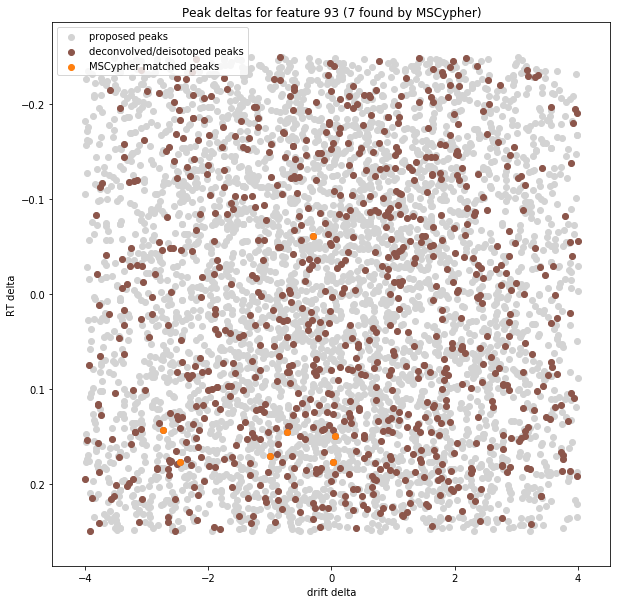

In [274]:
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.scatter(ms2_peaks_df.scan_distance, ms2_peaks_df.rt_distance, marker='o', color='lightgray', label='proposed peaks')
ax1.scatter(feature_peaks_df.scan_delta, feature_peaks_df.rt_delta, marker='o', color='tab:brown', label='deconvolved/deisotoped peaks')
ax1.scatter(msc_matched_df.scan_delta, msc_matched_df.rt_delta, marker='o', color='tab:orange', label='MSCypher matched peaks')
plt.legend(loc='best')
ax1.set_xlabel('drift delta')
ax1.set_ylabel('RT delta')
plt.title("Peak deltas for feature {} ({} found by MSCypher)".format(feature_id, len(msc_matched_df)))
plt.gca().invert_yaxis()
plt.margins(0.06)
plt.show()

In [275]:
# get all the features
features_fragments_df = pd.read_table(features_fragments_file, sep=",", low_memory=False)

In [276]:
features_fragments_df['msc_DeltaMassPPM_abs'] = features_fragments_df.msc_DeltaMassPPM.abs()

In [277]:
features_fragments_df.sort_values(by=['msc_DeltaMassPPM_abs'], inplace=True, ascending=True)

In [278]:
features_fragments_df[features_fragments_df.msc_DeltaMassPPM_abs > 0].head()

,feature_id,charge_state,monoisotopic_mass,retention_time_secs,isotope_count,cluster_mz_centroid,cluster_summed_intensity,minimum_error,minimum_error_sulphur,msc_DiggerPepScore,msc_DeltaMassDa,msc_DeltaMassPPM,msc_DeltaMassPPM_abs
361,362,2,874.502218,33.2,5,438.258385,28701025,0.017626,0,74.358,-0.000269,-0.307,0.307
38,39,2,1273.717096,968.2,5,637.865824,909251294,0.001241,0,159.035,-0.001199,-0.941,0.941
26,27,2,1016.527543,521.8,6,509.271048,1332943425,0.008339,0,31.242,-0.001552,-1.526,1.526
264,265,2,874.501099,33.2,5,438.257826,45884656,0.008767,0,64.255,-0.001387,-1.586,1.586
92,93,2,1378.747179,844.4,6,690.380866,271652559,0.005664,0,106.662,-0.002473,-1.793,1.793
